In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('csse_covid_19_daily_reports_us.csv', parse_dates = ['Last_Update'])

In [3]:
df.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584


In [4]:
df.isnull().sum()

Province_State           0
Country_Region           0
Last_Update              0
Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered               16
Active                   0
FIPS                     0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Mortality_Rate           1
UID                      0
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Province_State        58 non-null     object        
 1   Country_Region        58 non-null     object        
 2   Last_Update           58 non-null     datetime64[ns]
 3   Lat                   56 non-null     float64       
 4   Long_                 56 non-null     float64       
 5   Confirmed             58 non-null     int64         
 6   Deaths                58 non-null     int64         
 7   Recovered             42 non-null     float64       
 8   Active                58 non-null     float64       
 9   FIPS                  58 non-null     int64         
 10  Incident_Rate         56 non-null     float64       
 11  People_Tested         56 non-null     float64       
 12  People_Hospitalized   33 non-null     float64       
 13  Mortality_Rate        

In [6]:
df['Recovered'] = df['Recovered'].fillna(df['Recovered'].median())
df['Incident_Rate'] = df['Incident_Rate'].fillna(df['Incident_Rate'].mean())
df['Lat'] = df['Lat'].fillna(df['Lat'].mean())
df['Long_'] = df['Long_'].fillna(df['Long_'].mean())
df['People_Tested'] = df['People_Tested'].fillna(df['People_Tested'].median())

df['People_Hospitalized'] = df['People_Hospitalized'].fillna(df['People_Hospitalized'].median())

df['Mortality_Rate'] = df['Mortality_Rate'].fillna(df['Mortality_Rate'].mean())
df['Testing_Rate'] = df['Testing_Rate'].fillna(df['Testing_Rate'].mean())
df['Hospitalization_Rate'] = df['Hospitalization_Rate'].fillna(df['Hospitalization_Rate'].mean())

In [7]:
df.isnull().sum()

Province_State          0
Country_Region          0
Last_Update             0
Lat                     0
Long_                   0
Confirmed               0
Deaths                  0
Recovered               0
Active                  0
FIPS                    0
Incident_Rate           0
People_Tested           0
People_Hospitalized     0
Mortality_Rate          0
UID                     0
ISO3                    0
Testing_Rate            0
Hospitalization_Rate    0
dtype: int64

In [8]:
df.dtypes

Province_State                  object
Country_Region                  object
Last_Update             datetime64[ns]
Lat                            float64
Long_                          float64
Confirmed                        int64
Deaths                           int64
Recovered                      float64
Active                         float64
FIPS                             int64
Incident_Rate                  float64
People_Tested                  float64
People_Hospitalized            float64
Mortality_Rate                 float64
UID                              int64
ISO3                            object
Testing_Rate                   float64
Hospitalization_Rate           float64
dtype: object

In [9]:
df.describe(include = 'object')

,Province_State,Country_Region,ISO3
count,58,58,58
unique,58,1,6
top,Missouri,US,USA
freq,1,58,53


In [10]:
a = df.Last_Update.value_counts().sort_index()
print('The first date is:',a.index[0])
print('The last date is:',a.index[-1])

The first date is: 2020-05-21 02:32:54
The last date is: 2020-05-21 02:32:54


it is only one date dataset 2020-05-21

In [11]:
df = df.drop(['Country_Region','ISO3'], axis =1)

In [12]:
df = df.drop(['Last_Update'], axis =1)

In [13]:
Corona_cases = df.groupby(by = 'Province_State')['Confirmed',
                                   'Recovered',
                                   'Deaths'].sum().reset_index()  

In [14]:
Corona_cases.sort_values(by ='Confirmed', ascending = False)

,Province_State,Confirmed,Recovered,Deaths
36,New York,354370,61886.0,28636
34,New Jersey,150776,23945.0,10749
17,Illinois,100418,3008.0,4525
25,Massachusetts,88970,3008.0,6066
5,California,85997,3008.0,3497
43,Pennsylvania,68126,3008.0,4770
26,Michigan,53009,28234.0,5060
49,Texas,51673,30341.0,1426
11,Florida,47471,3008.0,2096
24,Maryland,42323,2993.0,2123


Text(0, 0.5, '')

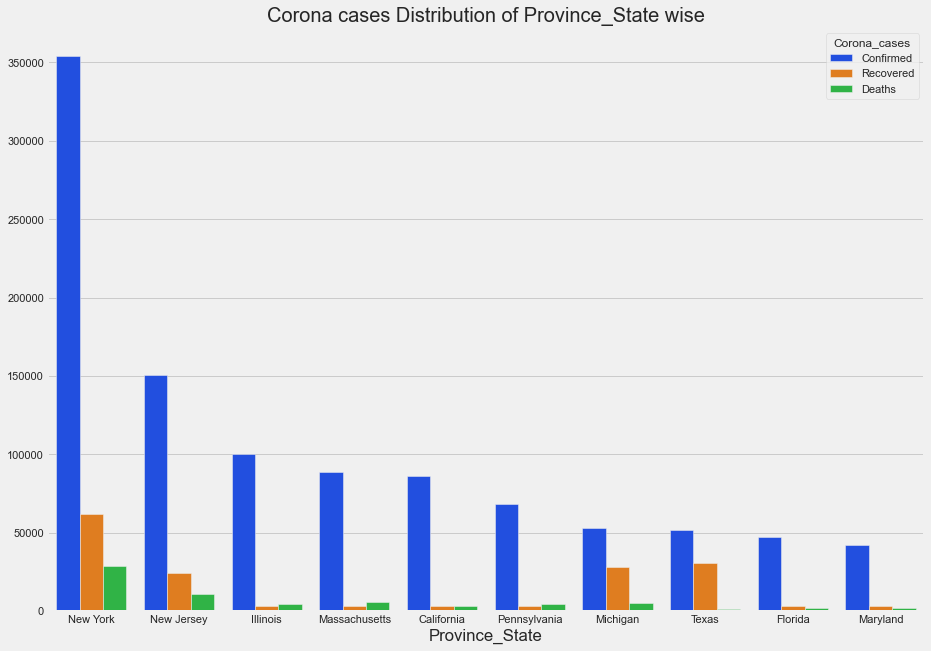

In [15]:
Corona_cases = df.groupby(['Province_State'])['Confirmed',
                                   'Recovered',
                                   'Deaths',].sum().sort_values(by ='Confirmed', ascending = False).head(10).reset_index()  #grouby year and age group
Corona_cases = Corona_cases.melt('Province_State', var_name='Corona_cases',  value_name='vals') #melting the dataset

plt.style.use("fivethirtyeight")
plt.figure(figsize = (14,10))
ax = sns.barplot(x = 'Province_State' , y = 'vals',hue = 'Corona_cases' ,data = Corona_cases ,palette= 'bright')
plt.title('Corona cases Distribution of Province_State wise',size = 20)
ax.get_legend().set_bbox_to_anchor((1, 1))
ax.set_ylabel('')

Here we clearly see that Corona is largly spread on the new york wrost condition here

Floride and Maryland the situation is under control

But we see that llinois, Massachusetts and pennsylvania the death is more than as compare to recovered condition is not well

In [16]:
top_Confirmed = df.groupby(by = 'Province_State')['Confirmed'].sum().sort_values(ascending = False).head(20).reset_index()
top_Confirmed

,Province_State,Confirmed
0,New York,354370
1,New Jersey,150776
2,Illinois,100418
3,Massachusetts,88970
4,California,85997
5,Pennsylvania,68126
6,Michigan,53009
7,Texas,51673
8,Florida,47471
9,Maryland,42323


[Text(0, 0.5, 'Province_State'), Text(0.5, 0, 'Total cases')]

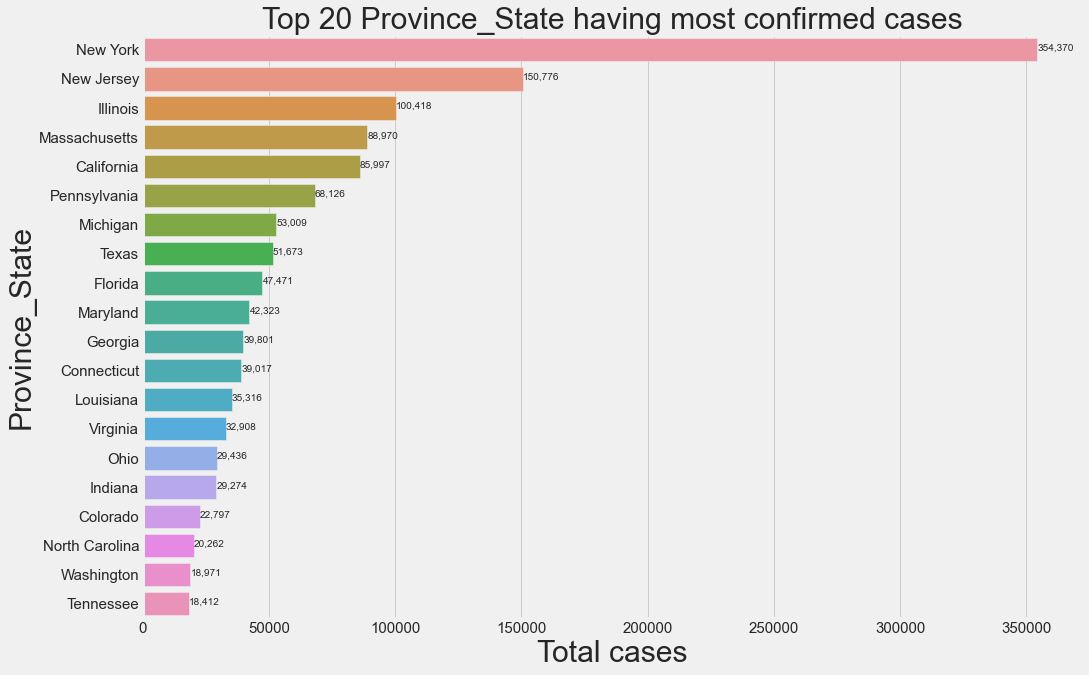

In [17]:
plt.figure(figsize= (15,10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Total cases",fontsize = 30)
plt.ylabel('Province_State',fontsize = 30)
plt.title("Top 20 Province_State having most confirmed cases" , fontsize = 30)
ax = sns.barplot(x = top_Confirmed.Confirmed, y = top_Confirmed.Province_State)
for i, (value, name) in enumerate(zip(top_Confirmed.Confirmed,top_Confirmed.Province_State)):
    ax.text(value, i-.05, f'{value:,.0f}',  size=10, ha='left',  va='center')
ax.set(xlabel='Total cases', ylabel='Province_State')

Here are my observations :

1) New york was leading this they are not controlling the pandemic spread.

2) The number of confirmed cases are on a high in the  New york, New jersey and illinois.

3) The number of cases in the Washington , Tennessee and North Carolina is less.

In [18]:
top_active = df.groupby(by = 'Province_State')['Active'].sum().sort_values(ascending = False).head(20).reset_index()
top_active

,Province_State,Active
0,New York,263848.0
1,New Jersey,116082.0
2,Illinois,95893.0
3,Massachusetts,82904.0
4,California,82500.0
5,Pennsylvania,63356.0
6,Florida,45375.0
7,Georgia,38104.0
8,Maryland,37207.0
9,Connecticut,29224.0


[Text(0, 0.5, 'Province_State'), Text(0.5, 0, 'Total cases')]

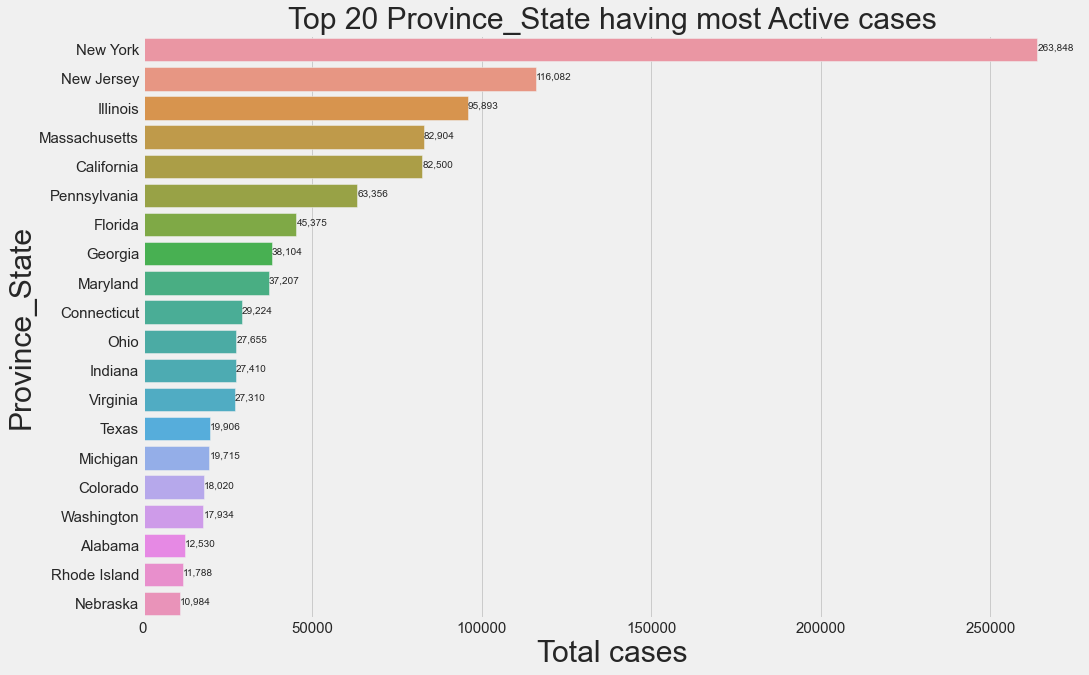

In [19]:
plt.figure(figsize= (15,10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Total cases",fontsize = 30)
plt.ylabel('Province_State',fontsize = 30)
plt.title("Top 20 Province_State having most Active cases" , fontsize = 30)
ax = sns.barplot(x = top_active.Active, y = top_active.Province_State)
for i, (value, name) in enumerate(zip(top_active.Active,top_active.Province_State)):
    ax.text(value, i-.05, f'{value:,.0f}',  size=10, ha='left',  va='center')
ax.set(xlabel='Total cases', ylabel='Province_State')

Here are my observations :


1) The number of active cases is on a high in the New york, New jersey and illinois.

2) The number of active cases in the Washington , Alabama and Rhode Island is less.

In [20]:
top_recovered = df.groupby(by = 'Province_State')['Recovered'].sum().sort_values(ascending = False).head(20).reset_index()
top_recovered

,Province_State,Recovered
0,New York,61886.0
1,Texas,30341.0
2,Michigan,28234.0
3,Louisiana,26249.0
4,New Jersey,23945.0
5,Minnesota,12227.0
6,Tennessee,11783.0
7,North Carolina,11637.0
8,Iowa,8362.0
9,Wisconsin,7728.0


[Text(0, 0.5, 'Province_State'), Text(0.5, 0, 'Total cases')]

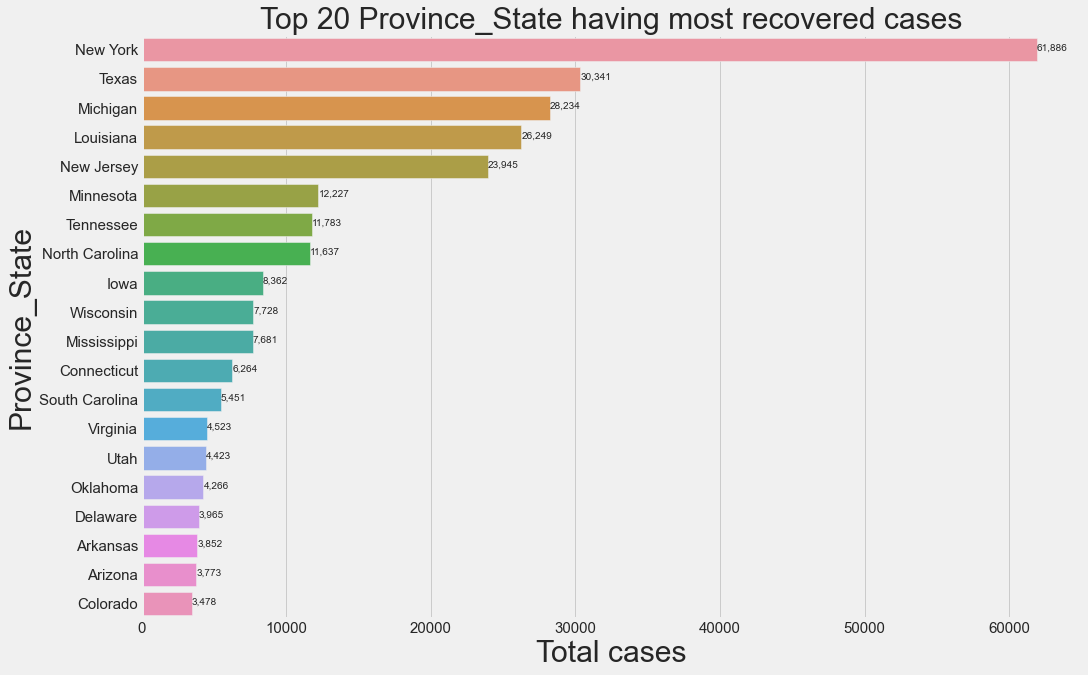

In [21]:
plt.figure(figsize= (15,10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Total cases",fontsize = 30)
plt.ylabel('Province_State',fontsize = 30)
plt.title("Top 20 Province_State having most recovered cases" , fontsize = 30)
ax = sns.barplot(x = top_recovered.Recovered, y = top_recovered.Province_State)
for i, (value, name) in enumerate(zip(top_recovered.Recovered,top_recovered.Province_State)):
    ax.text(value, i-.05, f'{value:,.0f}',  size=10, ha='left',  va='center')
ax.set(xlabel='Total cases', ylabel='Province_State')

Texas,Michigan and Louisiana number of cases is less also recoverd rate is high they are good to control virus

In [22]:
top_deaths = df.groupby(by = 'Province_State')['Deaths'].sum().sort_values(ascending = False).head(20).reset_index()
top_deaths

,Province_State,Deaths
0,New York,28636
1,New Jersey,10749
2,Massachusetts,6066
3,Michigan,5060
4,Pennsylvania,4770
5,Illinois,4525
6,Connecticut,3529
7,California,3497
8,Louisiana,2608
9,Maryland,2123


[Text(0, 0.5, 'Province_State'), Text(0.5, 0, 'Total cases')]

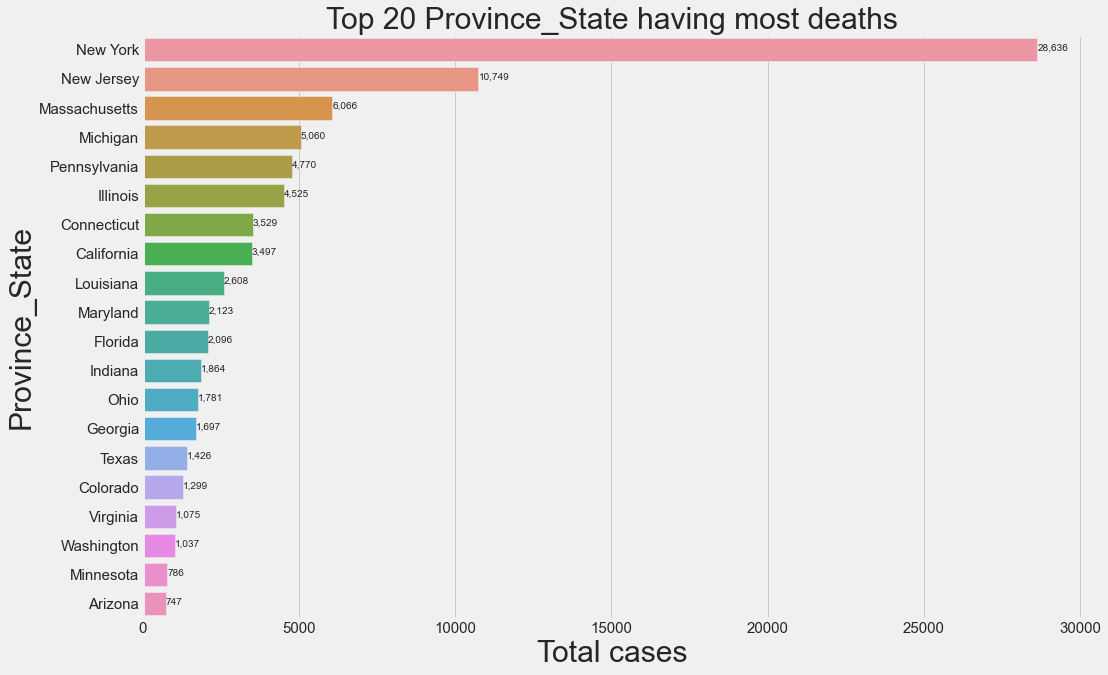

In [23]:
plt.figure(figsize= (15,10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Total cases",fontsize = 30)
plt.ylabel('Province_State',fontsize = 30)
plt.title("Top 20 Province_State having most deaths" , fontsize = 30)
ax = sns.barplot(x = top_deaths.Deaths, y = top_deaths.Province_State)
for i, (value, name) in enumerate(zip(top_deaths.Deaths,top_deaths.Province_State)):
    ax.text(value, i-.05, f'{value:,.0f}',  size=10, ha='left',  va='center')
ax.set(xlabel='Total cases', ylabel='Province_State')

New York and New jersey are very bad to control pandemic the virus is spread all over this state

In [24]:
mortality = df.groupby(by = 'Province_State')['Mortality_Rate'].sum().sort_values(ascending = False).head(20).reset_index()
mortality

,Province_State,Mortality_Rate
0,Michigan,9.545549
1,Northern Mariana Islands,9.523810
2,Connecticut,9.044775
3,Virgin Islands,8.695652
4,New York,8.080819
5,Louisiana,7.384755
6,New Jersey,7.129119
7,Pennsylvania,7.001732
8,Massachusetts,6.818029
9,Indiana,6.367425


[Text(0, 0.5, 'Province_State'), Text(0.5, 0, 'Mortality Rate')]

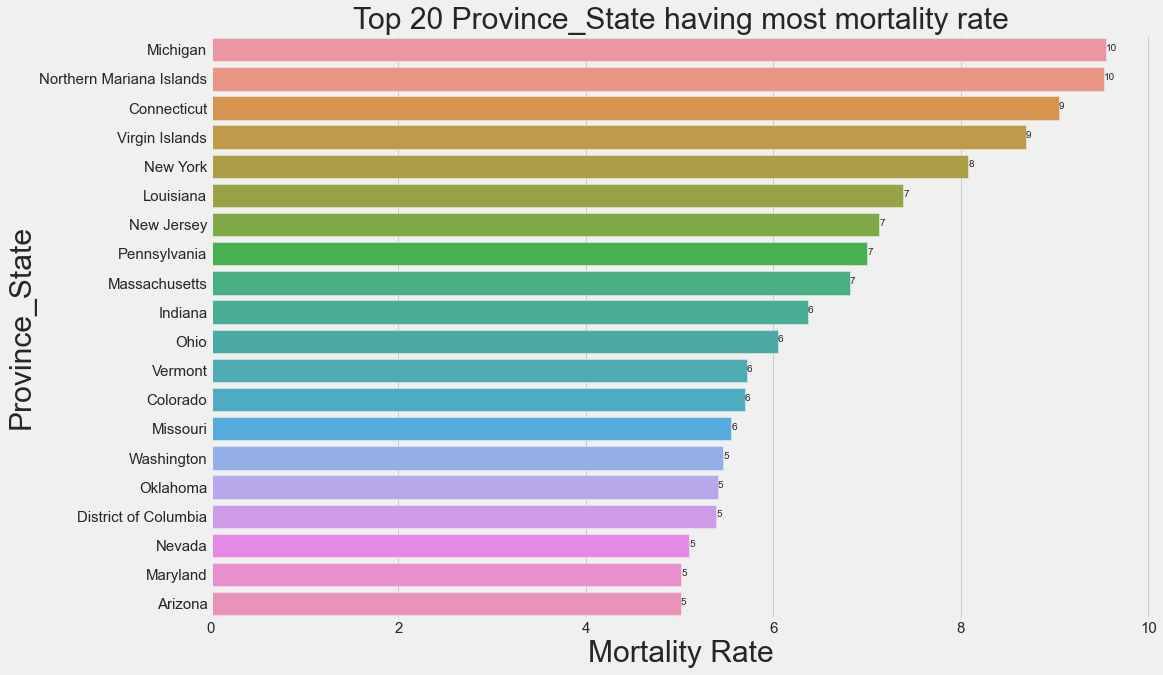

In [25]:
plt.figure(figsize= (15,10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Total cases",fontsize = 30)
plt.ylabel('Province_State',fontsize = 30)
plt.title("Top 20 Province_State having most mortality rate" , fontsize = 30)
ax = sns.barplot(x = mortality['Mortality_Rate'], y = mortality.Province_State)
for i, (value, name) in enumerate(zip(mortality['Mortality_Rate'], mortality.Province_State)):
    ax.text(value, i-.05, f'{value:,.0f}',  size=10, ha='left',  va='center')
ax.set(xlabel='Mortality Rate', ylabel='Province_State')

In [26]:
testing_people = df.groupby(by = 'Province_State')['People_Tested'].sum().sort_values(ascending = False).head(20).reset_index()
testing_people

,Province_State,People_Tested
0,New York,1505836.0
1,California,1380120.0
2,Florida,771348.0
3,Texas,770241.0
4,Illinois,642713.0
5,New Jersey,531343.0
6,Massachusetts,489953.0
7,Michigan,437072.0
8,Georgia,402940.0
9,Tennessee,354013.0


[Text(0, 0.5, 'Province_State'), Text(0.5, 0, 'People Tested')]

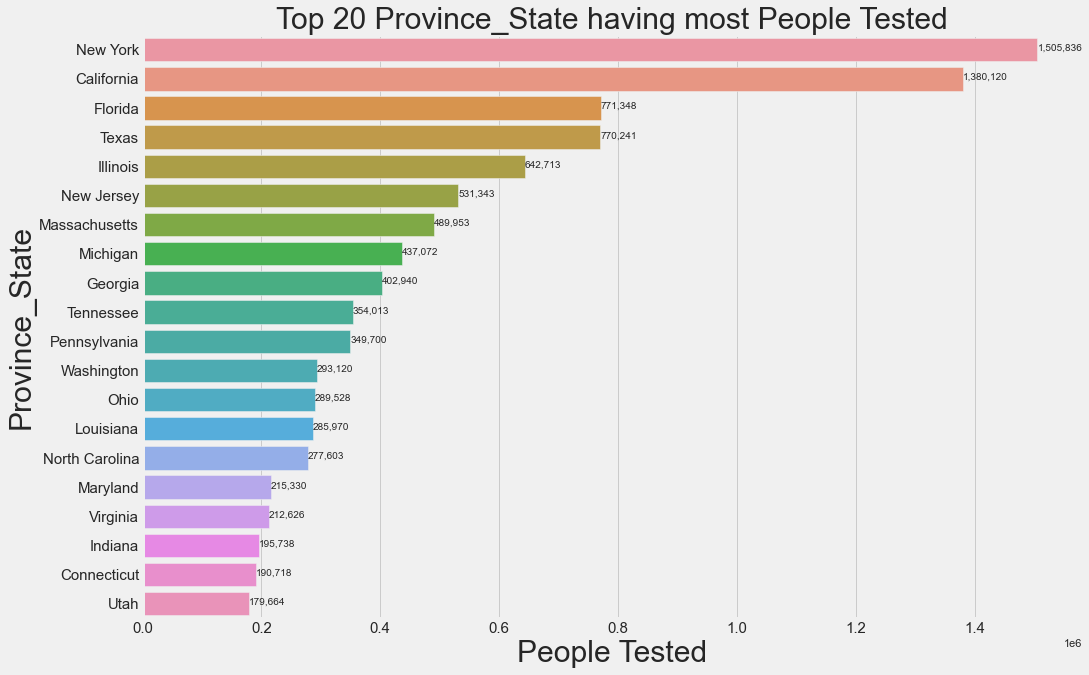

In [27]:
plt.figure(figsize= (15,10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Total cases",fontsize = 30)
plt.ylabel('Province_State',fontsize = 30)
plt.title("Top 20 Province_State having most People Tested" , fontsize = 30)
ax = sns.barplot(x = testing_people['People_Tested'], y = testing_people.Province_State)
for i, (value, name) in enumerate(zip(testing_people['People_Tested'], testing_people.Province_State)):
    ax.text(value, i-.05, f'{value:,.0f}',  size=10, ha='left',  va='center')
ax.set(xlabel='People Tested', ylabel='Province_State')

Here we see that New york is high in people tested but also most confirmed cases and deaths cobdition is wrost in here

But california number of cases is not more as New york but they doing well in people tested they control the pandemic

In [28]:
testing = df.groupby(by = 'Province_State')['Testing_Rate'].sum().sort_values(ascending = False).head(20).reset_index()
testing

,Province_State,Testing_Rate
0,Rhode Island,11377.424693
1,North Dakota,7768.396797
2,New York,7740.670204
3,Massachusetts,7108.491647
4,Northern Mariana Islands,6921.877267
5,New Mexico,6783.862680
6,Louisiana,6151.487891
7,New Jersey,5982.117023
8,District of Columbia,5727.106946
9,Utah,5604.065930


[Text(0, 0.5, 'Province_State'), Text(0.5, 0, 'Testing Rate')]

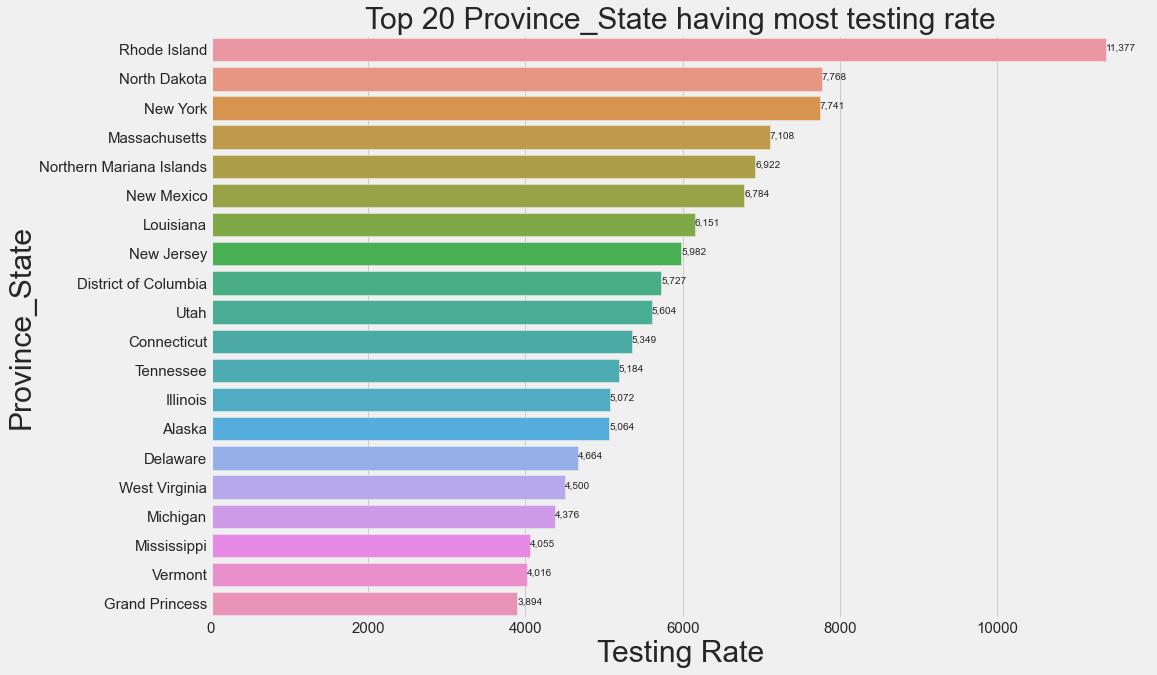

In [29]:
plt.figure(figsize= (15,10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Total cases",fontsize = 30)
plt.ylabel('Province_State',fontsize = 30)
plt.title("Top 20 Province_State having most testing rate" , fontsize = 30)
ax = sns.barplot(x = testing['Testing_Rate'], y = testing.Province_State)
for i, (value, name) in enumerate(zip(testing['Testing_Rate'], testing.Province_State)):
    ax.text(value, i-.05, f'{value:,.0f}',  size=10, ha='left',  va='center')
ax.set(xlabel='Testing Rate', ylabel='Province_State')

Rhode Island and North Dakota are less number of cases less and their Testing rate is high they are controlling the pandemic

In [30]:
Hospitalization = df.groupby(by = 'Province_State')['Hospitalization_Rate'].sum().sort_values(ascending = False).head(20).reset_index()
Hospitalization

,Province_State,Hospitalization_Rate
0,Connecticut,28.054438
1,Kentucky,24.611240
2,New York,21.562209
3,Oregon,19.021310
4,Florida,18.819911
5,Virginia,18.411936
6,New Mexico,18.030711
7,Georgia,17.856335
8,Ohio,17.658649
9,Maryland,17.468043


[Text(0, 0.5, 'Province_State'), Text(0.5, 0, 'Hospitalization Rate')]

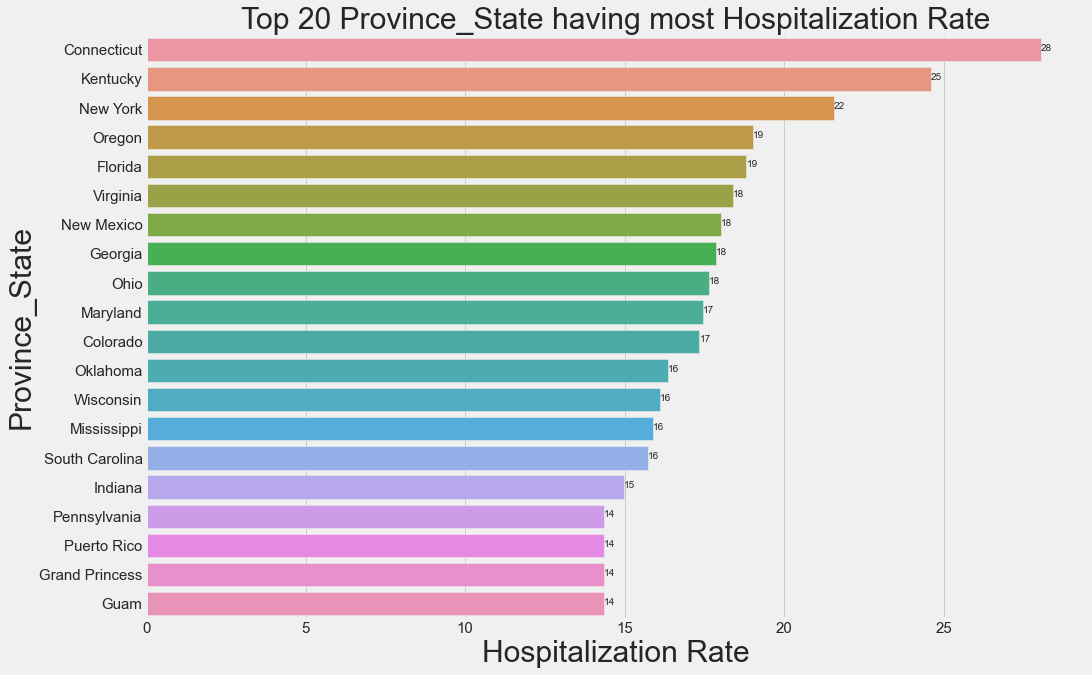

In [31]:
plt.figure(figsize= (15,10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Total cases",fontsize = 30)
plt.ylabel('Province_State',fontsize = 30)
plt.title("Top 20 Province_State having most Hospitalization Rate" , fontsize = 30)
ax = sns.barplot(x = Hospitalization['Hospitalization_Rate'], y = Hospitalization.Province_State)
for i, (value, name) in enumerate(zip(Hospitalization['Hospitalization_Rate'], Hospitalization.Province_State)):
    ax.text(value, i-.05, f'{value:,.0f}',  size=10, ha='left',  va='center')
ax.set(xlabel='Hospitalization Rate', ylabel='Province_State')

Hospitalization Rate is high in Connecticut and Kentucky as compared to new york where maximum in number of cases

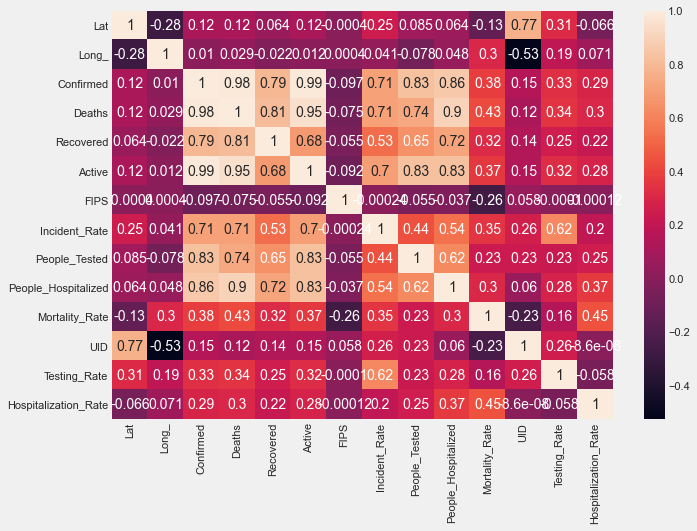

In [32]:
import seaborn as sns
corr = df.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr,annot=True)
plt.show()

We draw this correlation result on the bar plot to get better understanding

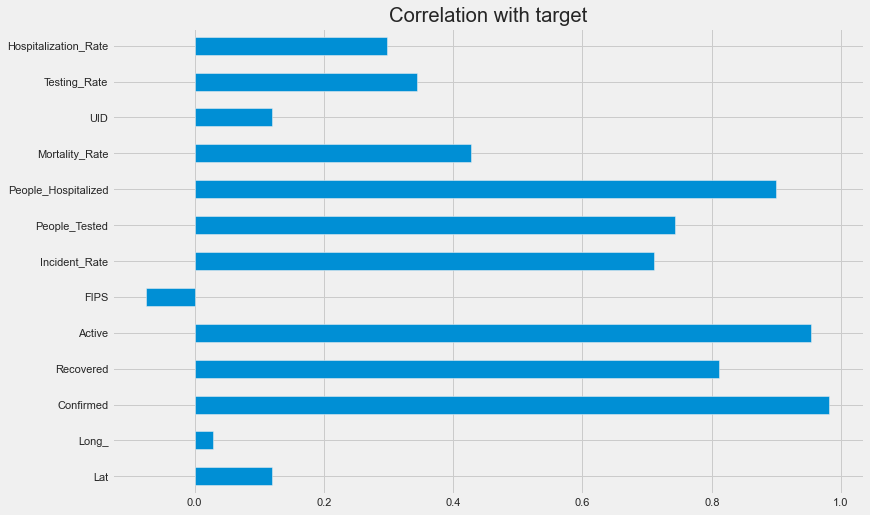

In [33]:
df.drop('Deaths', axis=1).corrwith(df.Deaths).plot(kind='barh', grid=True, figsize=(12, 8), 
                                                   title="Correlation with target")

1) Active and Confirmed are similarly high correlated with the target(Death) also lots of features highly correlated we not use    all the features for model building because we not want that our model is overfitted

2) Long_ , Lat and FIPS are very less correlated with the target(Death) we drop these variables

In [34]:
df_new = df.drop(['Long_','Lat','FIPS','UID','Province_State'], axis = 1)

In [35]:
df_new.skew(axis=0)

Confirmed               4.708614
Deaths                  5.489201
Recovered               3.797239
Active                  4.180953
Incident_Rate           1.988351
People_Tested           2.847892
People_Hospitalized     7.015366
Mortality_Rate          0.496115
Testing_Rate            1.313407
Hospitalization_Rate    0.867341
dtype: float64

In [36]:
# Treating the skewness in the dataset
for index in df_new.skew().index:
    if df_new.skew().loc[index]>0.55:
        df_new[index]=np.log1p(df_new[index])

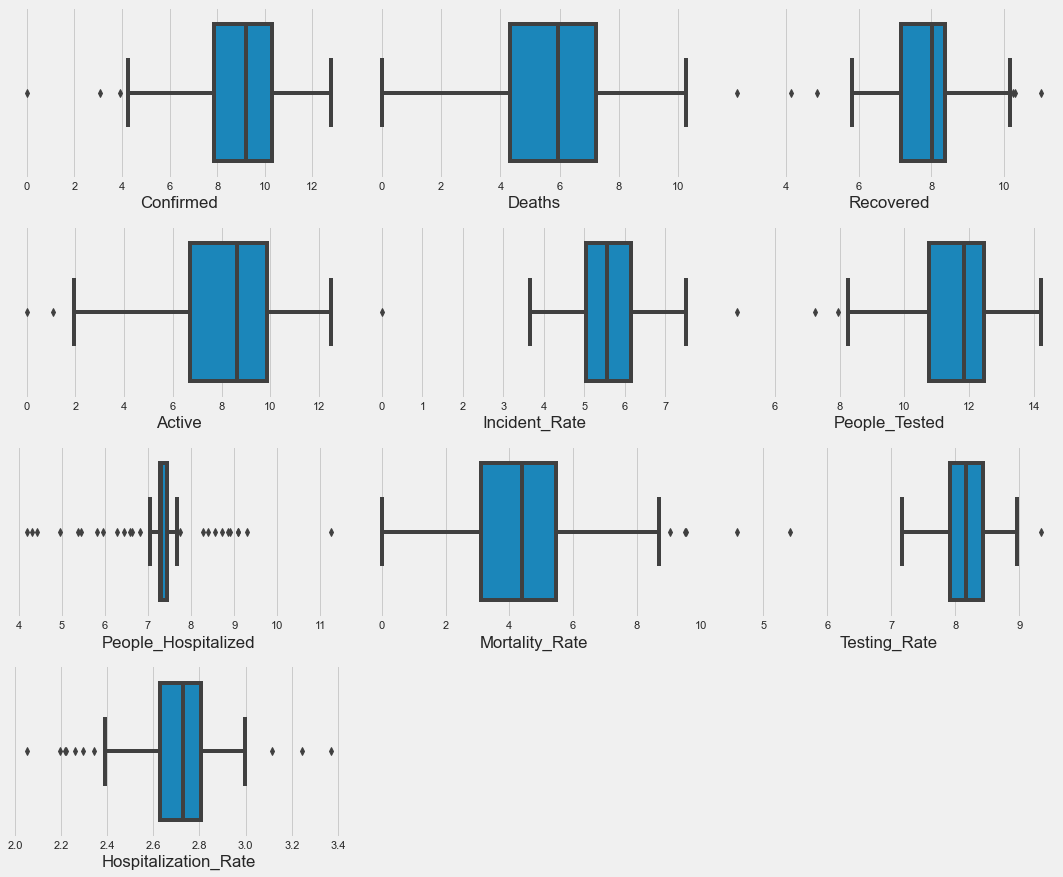

In [37]:
fig = plt.figure(figsize=(15,15))
for i in range(len(df_new.columns)):
    fig.add_subplot(5,3,i+1)
    sns.boxplot(df_new.iloc[:,i])

plt.tight_layout()
plt.show()

We have some outliers we remove just using Z- score

My medium blog about outliers treatment - https://vivekrai1011.medium.com/all-about-outlier-detction-techniques-4e7a803bd6

In [38]:
# Remove Outliers
from scipy.stats import zscore
z_score=abs(zscore(df_new))
print("The shape of dataset before removing outliers",df_new.shape)
df_new=df_new.loc[(z_score<3).all(axis=1)]
print("The shape of dataset after removing outliers",df_new.shape)

The shape of dataset before removing outliers (58, 10)
The shape of dataset after removing outliers (54, 10)


In [39]:
df_new.head()

,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate
0,9.476773,6.259581,8.009363,9.435961,5.587976,12.010368,7.309212,3.999387,8.118190,2.520825
1,5.996452,2.397895,5.866468,3.688879,4.022051,10.519916,7.309212,2.493766,8.530098,2.730629
3,9.609586,6.617403,8.235891,9.248310,5.326851,12.016340,7.491645,5.011405,7.729234,2.566641
4,8.517993,4.682131,8.256607,6.951772,5.116692,11.474798,6.284134,2.138717,8.067986,2.459040
5,11.362079,8.159947,8.009363,11.320566,5.387457,14.137682,7.309212,4.066421,8.158772,2.730629


In [40]:
df_new.columns

Index(['Confirmed', 'Deaths', 'Recovered', 'Active', 'Incident_Rate',
       'People_Tested', 'People_Hospitalized', 'Mortality_Rate',
       'Testing_Rate', 'Hospitalization_Rate'],
      dtype='object')

In [41]:
X = df_new[['Confirmed','Recovered','People_Tested','People_Hospitalized']]
y = df_new['Deaths']

In [42]:
# Splitting data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

In [43]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

In [44]:
#importing ML models from scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [45]:
#to save time all models can be applied once using for loop
regressors = {
    'Linear Regression' : LinearRegression(),
    'Decision Tree' : DecisionTreeRegressor(),
    'Random Forest' : RandomForestRegressor(),
    'AdaBoost'      : AdaBoostRegressor(),
    'GradientBoosting': GradientBoostingRegressor(),
    'Support Vector Machines' : SVR(gamma=1),
    'K-nearest Neighbors' : KNeighborsRegressor(n_neighbors=1),
    'XGBoost' : XGBRegressor()
}
results=pd.DataFrame(columns=['MAE','MSE','R2-score'])
for method,func in regressors.items():
    model = func.fit(X_train,y_train)
    pred = model.predict(X_test)
    results.loc[method]= [np.round(mean_absolute_error(y_test,pred),3),
                          np.round(mean_squared_error(y_test,pred),3),
                          np.round(r2_score(y_test,pred),3)
                         ]

In [46]:
results

,MAE,MSE,R2-score
Linear Regression,0.486,0.386,0.935
Decision Tree,0.561,0.451,0.924
Random Forest,0.582,0.665,0.888
AdaBoost,0.513,0.414,0.930
GradientBoosting,0.549,0.501,0.915
Support Vector Machines,1.485,3.892,0.342
K-nearest Neighbors,0.738,0.884,0.851
XGBoost,0.654,0.644,0.891


Linear Regression is the best model

In [47]:
from sklearn.model_selection import cross_val_score
lm = LinearRegression()
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=10)
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())     

Scores: [0.87423857 0.90439235 0.94542379 0.61870132 0.84722972 0.56474884
 0.94112624 0.90375902 0.97274812 0.52772289]
Mean: 0.8100090858138008
Standard Deviation: 0.16175835159132076


In [48]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge = Ridge()

params = {'alpha':[0.001,0.01, 0.02, 0.05, 0.1,1,3,5],'random_state':range(42,100)}

clf= GridSearchCV(ridge,params)
clf.fit(X_train, y_train)
clf.best_params_

{'alpha': 0.1, 'random_state': 42}

In [49]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso = Lasso()

params = {'alpha':[0.001,0.01, 0.02, 0.05, 0.1,1,3,5],'random_state':range(42,100)}

clf= GridSearchCV(lasso,params)
clf.fit(X_train, y_train)
clf.best_params_

{'alpha': 0.05, 'random_state': 42}

In [53]:
ridge = Ridge(alpha =  0.1, random_state =  42)
scores = cross_val_score(ridge, X_train, y_train, scoring='r2', cv=10)
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())     

Scores: [0.87509388 0.90343852 0.94535559 0.6211266  0.84662071 0.56255266
 0.94043264 0.90373382 0.97130212 0.53874304]
Mean: 0.8108399568251956
Standard Deviation: 0.15966336055659927


In [54]:
lasso = Lasso(alpha =  0.05, random_state =  42)
scores = cross_val_score(lasso, X_train, y_train, scoring='r2', cv=10)
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())     

Scores: [0.86202151 0.87127543 0.94648707 0.74820715 0.87484122 0.44268946
 0.94535489 0.86515339 0.95942406 0.89064378]
Mean: 0.8406097950780833
Standard Deviation: 0.14451768958937208


In [52]:
import joblib
joblib.dump(Lasso, 'covid_19_USA_pkl')

['covid_19_USA_pkl']